In [1]:
!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 59.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorfl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.0


In [2]:
!pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinsensiusharyohadi","key":"aa4beb99ae8fd013192a441a32f194db"}'}

In [3]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list -s 'Brain Tumor Classification (MRI)'

ref                                                    title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sartajbhuvaji/brain-tumor-classification-mri           Brain Tumor Classification (MRI)                87MB  2020-05-24 16:24:55          32798        484  0.875            
jarvisgroot/brain-tumor-classification-mri-images      Brain Tumor Classification MRI Images          633MB  2021-07-04 21:21:38            976         34  0.9375           
ahmedhamada0/brain-tumor-detection                     Br35H :: Brain Tumor Detection 2020             84MB  2021-11-14 04:39:25          12668        231  0.875            
masoudnickparvar/brain-tumor-mri-dataset               Brain Tumor MRI Dataset                        149MB  2021-09-24 12:43:45  

In [5]:
!kaggle datasets download -d 'sartajbhuvaji/brain-tumor-classification-mri'

 75% 65.0M/86.8M [00:00<00:00, 107MB/s]
100% 86.8M/86.8M [00:00<00:00, 115MB/s]


In [6]:
import zipfile,os,shutil

In [7]:
fileZip = "brain-tumor-classification-mri.zip"
extracZip = zipfile.ZipFile(fileZip, 'r')
extracZip.extractall("datasets")

In [8]:
os.listdir("/content/datasets")

['Training', 'Testing']

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/content/datasets'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/datasets/Training/glioma_tumor/gg (399).jpg
/content/datasets/Training/glioma_tumor/gg (298).jpg
/content/datasets/Training/glioma_tumor/gg (498).jpg
/content/datasets/Training/glioma_tumor/gg (116).jpg
/content/datasets/Training/glioma_tumor/gg (409).jpg
/content/datasets/Training/glioma_tumor/gg (335).jpg
/content/datasets/Training/glioma_tumor/gg (214).jpg
/content/datasets/Training/glioma_tumor/gg (243).jpg
/content/datasets/Training/glioma_tumor/gg (210).jpg
/content/datasets/Training/glioma_tumor/gg (518).jpg
/content/datasets/Training/glioma_tumor/gg (537).jpg
/content/datasets/Training/glioma_tumor/gg (618).jpg
/content/datasets/Training/glioma_tumor/gg (200).jpg
/content/datasets/Training/glioma_tumor/gg (364).jpg
/content/datasets/Training/glioma_tumor/gg (194).jpg
/content/datasets/Training/glioma_tumor/gg (659).jpg
/content/datasets/Training/glioma_tumor/gg (18).jpg
/content/datasets/Training/glioma_tumor/gg (411).jpg
/content/datasets/Training/glioma_tumor/gg (592

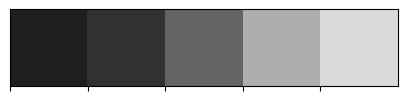

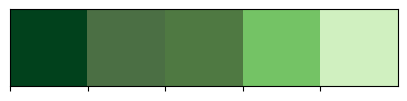

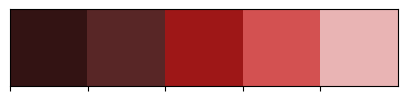

In [10]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [11]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [12]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('../content/datasets','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('../content/datasets','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 194.71it/s]


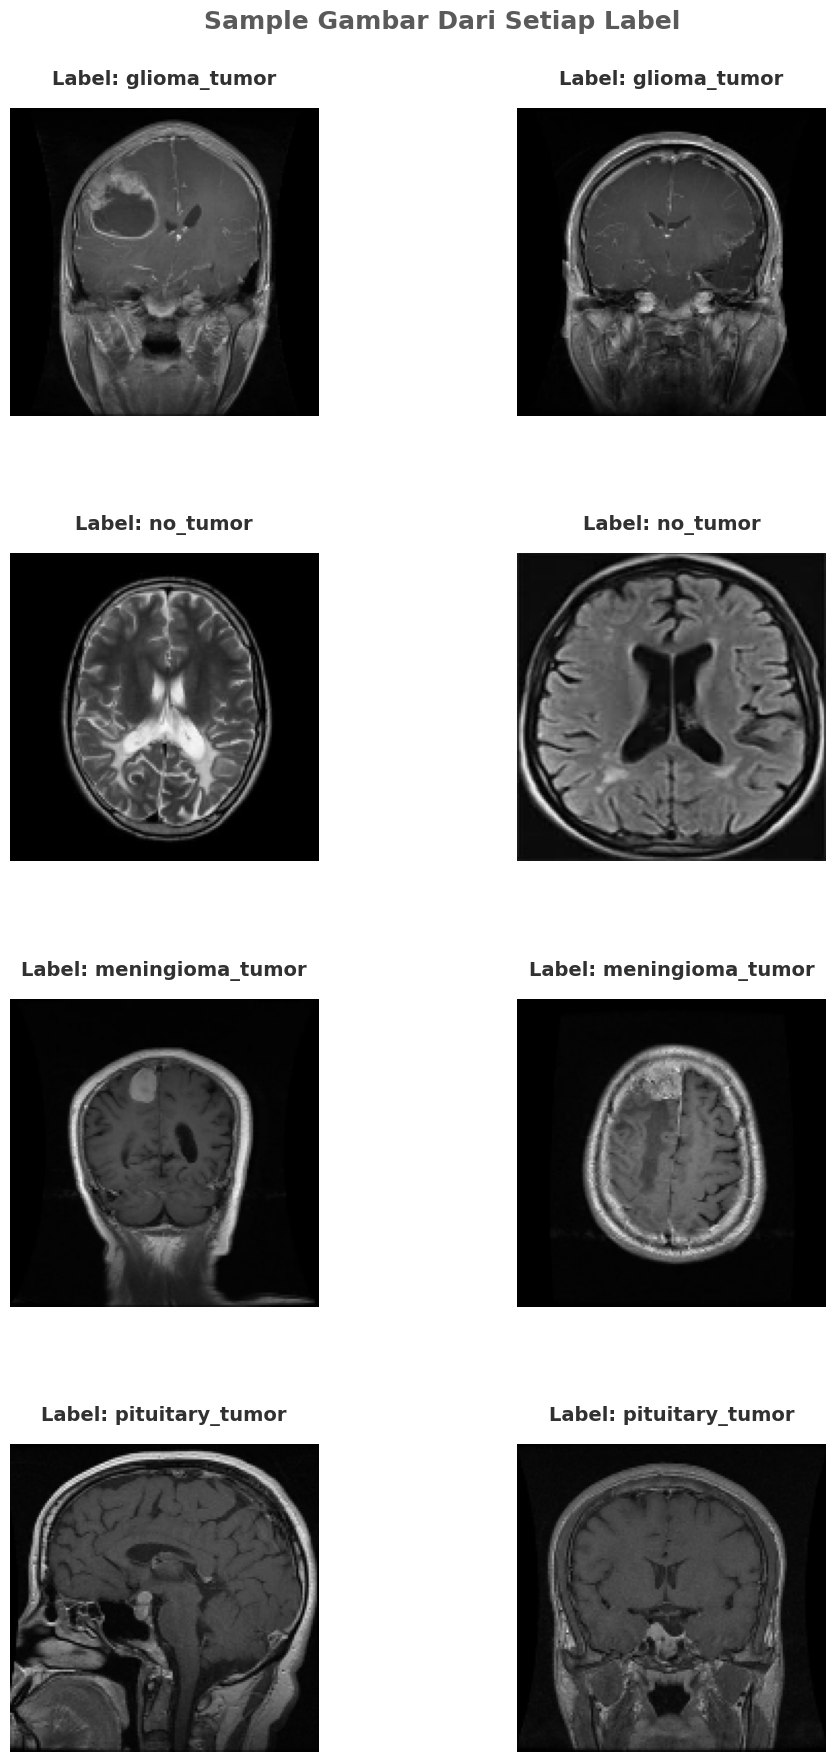

In [13]:
k = 0
fig, ax = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle('Sample Gambar Dari Setiap Label', fontsize=18, fontweight='bold', color=colors_dark[1], y=0.92, x=0.52, alpha=0.8)
for i in labels:
    j = 0
    count = 0
    while count < 2:
        if y_train[j] == i:
            img = X_train[j]
            ax[k//2, k%2].imshow(img)
            ax[k//2, k%2].set_title("Label: " + str(y_train[j]), fontsize=14, fontweight='bold', color=colors_dark[1], y=1.05)
            ax[k//2, k%2].axis('off')
            k += 1
            count += 1
        j += 1
fig.tight_layout(pad=7)
fig.show()

In [14]:
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [15]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [16]:
X_train.shape

(3264, 150, 150, 3)

In [17]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)
X_train.shape

(3264, 150, 150, 3)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [19]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [20]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 [==============================] - 0s 0us/step


In [21]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 150, 150, 3)  0           ['normalization[0][0]']      

In [23]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
tensorboard = TensorBoard(log_dir='logs')
checkpoint = ModelCheckpoint("tumorfix.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_delta=0.001, mode='auto', verbose=1)

Training Data


In [25]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=25, verbose=1, batch_size=32,
                    callbacks=[tensorboard, checkpoint, reduce_lr])

Epoch 1/25
83/83 [==============================] - ETA: 0s - loss: 0.4973 - accuracy: 0.8112
Epoch 1: val_accuracy improved from -inf to 0.90476, saving model to tumorfix.h5
83/83 [==============================] - 38s 218ms/step - loss: 0.4973 - accuracy: 0.8112 - val_loss: 0.3041 - val_accuracy: 0.9048 - lr: 0.0010
Epoch 2/25
83/83 [==============================] - ETA: 0s - loss: 0.2006 - accuracy: 0.9334
Epoch 2: val_accuracy did not improve from 0.90476
83/83 [==============================] - 12s 148ms/step - loss: 0.2006 - accuracy: 0.9334 - val_loss: 0.5090 - val_accuracy: 0.8401 - lr: 0.0010
Epoch 3/25
83/83 [==============================] - ETA: 0s - loss: 0.1462 - accuracy: 0.9493
Epoch 3: val_accuracy improved from 0.90476 to 0.93537, saving model to tumorfix.h5
83/83 [==============================] - 13s 160ms/step - loss: 0.1462 - accuracy: 0.9493 - val_loss: 0.2150 - val_accuracy: 0.9354 - lr: 0.0010
Epoch 4/25
83/83 [==============================] - ETA: 0s - loss:

In [26]:
print("Loss of the model is - ", model.evaluate(X_train,y_train)[0]*100, "%")
print("Accuracy of model is - ", model.evaluate(X_train,y_train)[1]*100, "%")

92/92 [==============================] - 3s 36ms/step - loss: 0.0095 - accuracy: 0.9973
Loss of the model is -  0.9462729096412659 %
92/92 [==============================] - 3s 31ms/step - loss: 0.0095 - accuracy: 0.9973
Accuracy of model is -  99.72761273384094 %


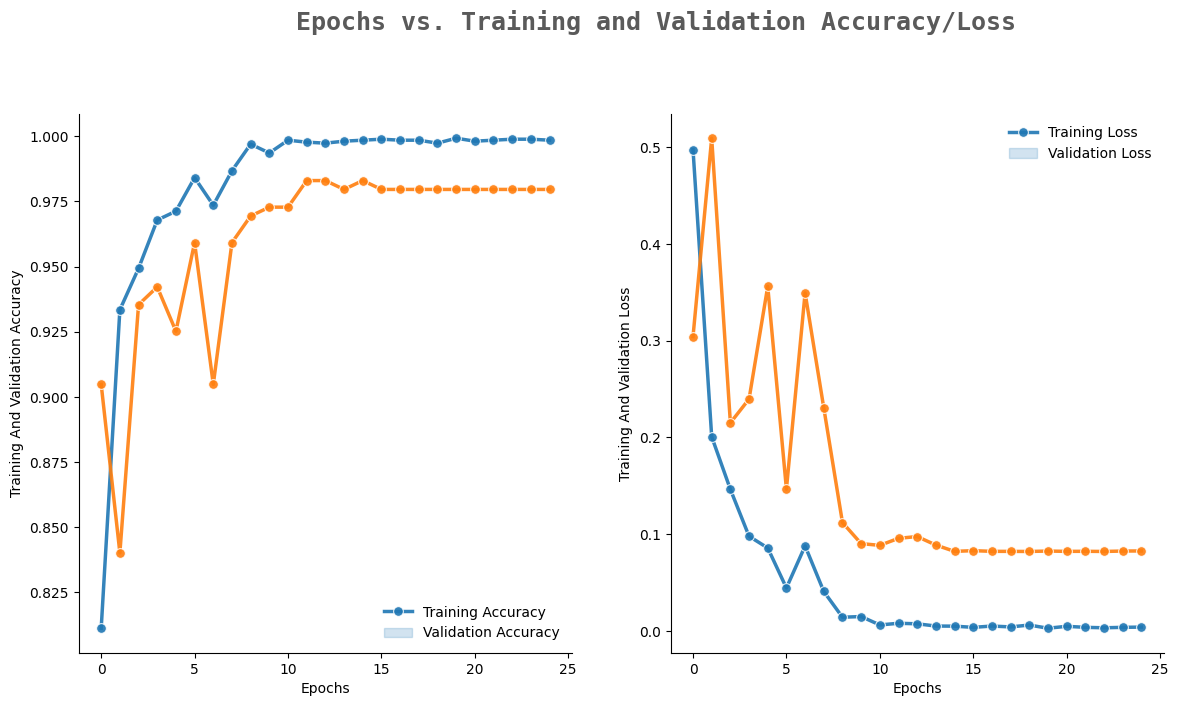

In [27]:
import warnings
filterwarnings('ignore')

colors_acc = ["#b1d4b4", "#95b8d1", "#eac4d5"]
colors_loss = ["#e8bdb1", "#f5cfb1", "#c0c0c0"]

epochs = [i for i in range(25)]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold', fontname='monospace',
         color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.lineplot(x=epochs, y=train_acc, marker='o', markersize=7, linewidth=2.5, alpha=0.9, palette=colors_acc, ax=ax[0])
sns.lineplot(x=epochs, y=val_acc, marker='o', markersize=7, linewidth=2.5, alpha=0.9, palette=colors_acc, ax=ax[0])

sns.lineplot(x=epochs, y=train_loss, marker='o', markersize=7, linewidth=2.5, alpha=0.9, palette=colors_loss, ax=ax[1])
sns.lineplot(x=epochs, y=val_loss, marker='o', markersize=7, linewidth=2.5, alpha=0.9, palette=colors_loss, ax=ax[1])

sns.despine()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training And Validation Accuracy')
ax[0].legend(['Training Accuracy', 'Validation Accuracy'], frameon=False)

sns.despine()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training And Validation Loss')
ax[1].legend(['Training Loss', 'Validation Loss'], frameon=False)

fig.show()

In [28]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 2s 69ms/step


In [29]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        93
           1       0.98      0.98      0.98        51
           2       0.97      0.97      0.97        96
           3       0.99      1.00      0.99        87

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327



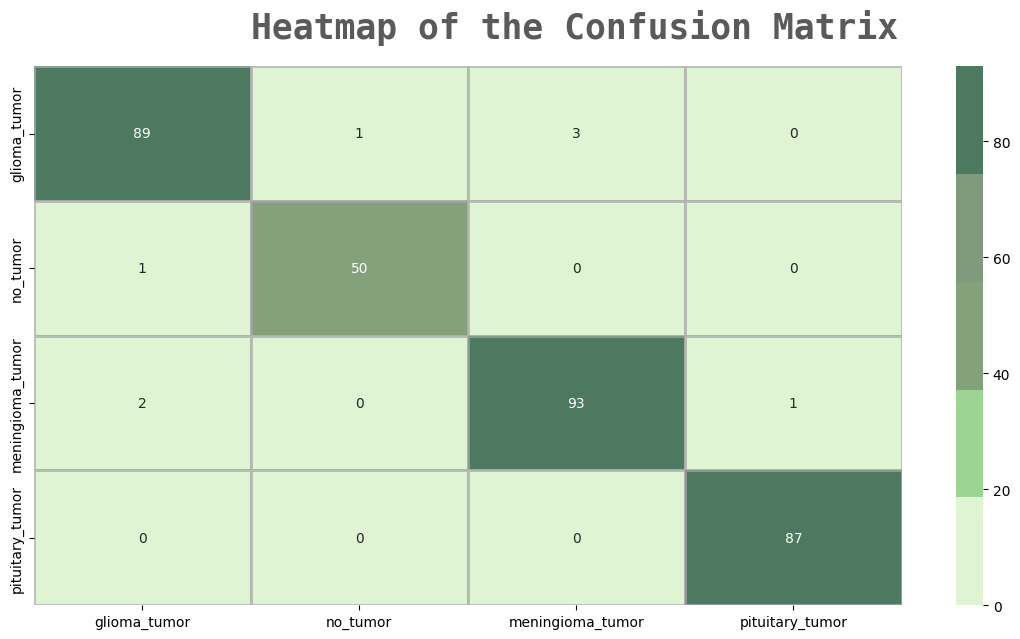

In [30]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=25,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
import IPython.display as display
import io
from PIL import Image
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
        display.display(img)
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('Model tersebut memprediksi tidak terdapat tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'Model tersebut memprediksi terdapat {p}')

def show_uploaded_image(uploader):
    img = Image.open(io.BytesIO(uploader.value[0]['content']))
    display.display(img)
uploader = widgets.FileUpload()
display.display(uploader)
# tombol prediksi dan output
button = widgets.Button(description='Predict')
out = widgets.Output()

# Fungsi untuk menangani saat tombol dipencet
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            # Memanggil fungsi untuk memprediksi gambar
            img_pred(uploader)

            # Menampilkan gambar yang diunggah
            show_uploaded_image(uploader)
        except:
            print('Made by Vinsensius')


button.on_click(on_button_clicked)
display.display(widgets.VBox([button, out]))


FileUpload(value={}, description='Upload')

In [ ]:
model.save("tumorotak.hdf5")
print('berhasil disimpan')

berhasil disimpan
